# Classification Problems

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# Logistic Regression

## Model

In [6]:
diabetes=pd.read_csv('diabetes.csv')
df=diabetes.copy()
df=df.dropna()

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

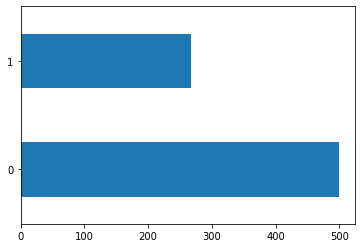

In [10]:
df['Outcome'].value_counts().plot.barh();

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
y=df['Outcome']
X=df.drop(['Outcome'],axis=1)


### Stats Model

In [13]:
loj=sm.Logit(y,X)
loj_model=loj.fit()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


In [14]:
loj_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:                 0.05922
Time:                        11:56:19   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

### Scikit-Learn

In [15]:
from sklearn.linear_model import LogisticRegression

In [17]:
loj=LogisticRegression(solver='liblinear')
lojmodel=loj.fit(X,y)
lojmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lojmodel.intercept_

array([-5.88848445])

In [19]:
lojmodel.coef_

array([[ 1.17086830e-01,  2.83748521e-02, -1.68971977e-02,
         7.45588118e-04, -6.42652274e-04,  5.97050348e-02,
         6.81461374e-01,  7.21476320e-03]])

### Prediction & Model Tuning

In [20]:
y_pred=lojmodel.predict(X)

In [21]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [120, 148]])

In [22]:
accuracy_score(y,y_pred)

0.7760416666666666

In [23]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [24]:
lojmodel.predict(X)[0:5]

array([1, 0, 1, 0, 1])

In [27]:
lojmodel.predict_proba(X)[0:10][:,0:2]

array([[0.35043775, 0.64956225],
       [0.9169891 , 0.0830109 ],
       [0.22455276, 0.77544724],
       [0.92139736, 0.07860264],
       [0.16635686, 0.83364314],
       [0.79900619, 0.20099381],
       [0.88017597, 0.11982403],
       [0.27815669, 0.72184331],
       [0.32117452, 0.67882548],
       [0.92268273, 0.07731727]])

In [28]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [30]:
y_probs = lojmodel.predict_proba(X)
y_probs = y_probs[:,1]

In [31]:
y_probs[0:10]

array([0.64956225, 0.0830109 , 0.77544724, 0.07860264, 0.83364314,
       0.20099381, 0.11982403, 0.72184331, 0.67882548, 0.07731727])

In [32]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [33]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [34]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]])

In [35]:
accuracy_score(y, y_pred)

0.7760416666666666

In [36]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [38]:
lojmodel.predict_proba(X)[:,1][0:5]

array([0.64956225, 0.0830109 , 0.77544724, 0.07860264, 0.83364314])

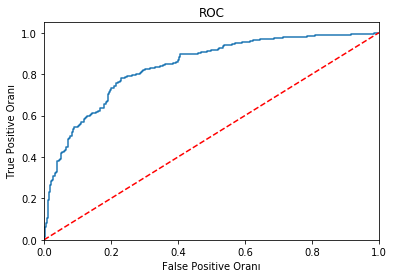

In [39]:
logit_roc_auc = roc_auc_score(y, lojmodel.predict(X))

fpr, tpr, thresholds = roc_curve(y, lojmodel.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)

In [41]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7575757575757576

In [43]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

# Gaussian Naive Bayes

In [44]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [45]:
from sklearn.naive_bayes import GaussianNB

In [46]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

In [48]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [49]:
y_pred = nb_model.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred)

0.7445887445887446

In [51]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN

## Model & Prediction

In [52]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [53]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [54]:
y_pred = knn_model.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [57]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [58]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [59]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.748637316561845
Best Parameters: {'n_neighbors': 11}


In [60]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [61]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [62]:
y_pred = knn_tuned.predict(X_test)

In [63]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC

## Model & Prediction

In [64]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [65]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [66]:
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
y_pred = svm_model.predict(X_test)

In [68]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [69]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 16.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [70]:
print("Parameters: " + str(svc_cv_model.best_params_))

Parameters: {'C': 5}


In [71]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

In [72]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC

## Model & Tahmin

In [73]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [74]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [75]:
svc_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [77]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [78]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    7.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [79]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 10, 'gamma': 0.0001}


In [80]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [81]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Artificial Neural Networks

## Model & Prediction

In [82]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [83]:
from sklearn.preprocessing import StandardScaler  

In [84]:
scaler = StandardScaler()

In [85]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [89]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

## Model Tuning

In [90]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [91]:
?mlpc

Type:        MLPClassifier
String form:
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
           beta_ <...>               tol=0.0001, validation_fraction=0.1, verbose=False,
           warm_start=False)
File:        /opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyp

In [92]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

In [93]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  8.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_stat...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 

In [94]:
print("Best Parameters: " + str(mlpc_cv_model.best_params_))

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100, 100), 'solver': 'sgd'}


In [96]:
mlpc_tuned = MLPClassifier(activation = "logistic", 
                           alpha = 0.0001, 
                           hidden_layer_sizes = (100, 100, 100),
                          solver = "sgd")

In [97]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [98]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.6536796536796536

# CART

## Model & Tahmin

In [99]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [102]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [104]:
!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

     |████████████████████████████████| 48 kB 1.7 MB/s eta 0:00:011
  Created wheel for skompiler: filename=SKompiler-0.5.5-py3-none-any.whl size=57146 sha256=e1df447c6cbdfc6b53e8832515071103f7f4e0a57d7293e30b3851795468f1b8
  Stored in directory: /Users/muratkahraman/Library/Caches/pip/wheels/1f/f6/09/b8aec43d39ab30463488d91526f29ba56155a6a6d61cf69986
Successfully built skompiler
((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((1 if x[1] <= 123.0 else 0) if x[2] <= 65.0 else 0) if
    x[2] <= 72.0 else 1) if x[4] <= 9.0 else (0 if x[6] <= 
    0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else 0) if x[0] <=
    4.5 else 0 if x[3] <= 40.5 else 1) if x[5] <= 49.10000038146973 else 1) if
    x[1] <= 127.5 else 1 if x[2] <= 56.0 else (0 if x[7] <= 27.5 else 0 if 
    x[3] <= 14.5 else 1) if x[5] <= 30.300000190734863 else 1 if x[5] <= 
    32.00000095367

In [105]:
x = [9]

In [106]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [107]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.70995670995671

## Model Tuning

In [108]:
cart_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
?cart_model

Type:        DecisionTreeClassifier
String form:
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
           <...> action_leaf=0.0, presort='deprecated',
           random_state=None, splitter='best')
File:        /opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min

In [110]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [111]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   13.5s finished


In [112]:
print("Best Parameters: " + str(cart_cv_model.best_params_))

Best Parameters: {'max_depth': 5, 'min_samples_split': 19}


In [113]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [114]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Random Forests

In [115]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [118]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [119]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [120]:
rf_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [121]:
?rf_model

Type:        RandomForestClassifier
String form:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
           c <...> obs=None, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Length:      100
File:        /opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=100)
    The number of trees in the forest.

    .. versionchanged:: 0.22
       The default value of ``n_estimators`` changed from 10 to 100
       in 0.22.

criterion :

In [122]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [123]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [124]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 166 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 369 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 652 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1017 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  9.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [125]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [126]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [127]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [128]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Importance Level')

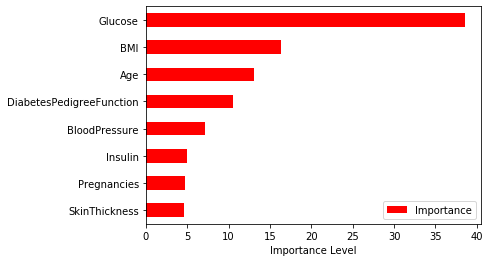

In [129]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Importance Level")

# Gradient Boosting Machines

In [130]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [131]:
from sklearn.ensemble import GradientBoostingClassifier

In [132]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [134]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Tuning

In [135]:
gbm_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [136]:
?gbm_model

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
           <...>                  validation_fraction=0.1, verbose=0,
           warm_start=False)
Length:      100
File:        /opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    

In [137]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [138]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [139]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [140]:
print("Best Parameters: " + str(gbm_cv.best_params_))

Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [141]:
gbm = GradientBoostingClassifier(learning_rate = 0.05, 
                                 max_depth = 5,
                                min_samples_split = 10,
                                n_estimators = 100)

In [142]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [143]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7186147186147186

# XGBoost

In [144]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [145]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [146]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [147]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [148]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [149]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> reg_lambda=1, scale_pos_weight=1, seed=None,
           silent=None, subsample=1, verbosity=1)
File:        /opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.

Parameters
----------
max_depth : int
    Maximum tree depth for base learners.
learning_rate : float
    Boosting learning rate (xgb's "eta")
n_estimators : int
    Number of trees to fit.
verbosity : int
    The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
silent : boolean
    Whether to print messages while running boosting. Deprecated. Use verbosity instead.
objective : string or callable
    Specify the learning task and the corresponding learning objective or
    a custom objective function to be used (see note below).
booster: string
    Specify which booster to use: gbtree, gb

In [150]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [151]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [152]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 393 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1041 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1486 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 2013 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 2620 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 3309 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 4078 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-1)]: Done 4929 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 25.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
 

In [153]:
xgb_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [154]:
xgb = XGBClassifier(learning_rate = 0.02, 
                    max_depth = 3,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.6)

In [155]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [156]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

# LightGBM

In [157]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [158]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [159]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [160]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [161]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           impo <...> ambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           /opt/anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/a

In [162]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [163]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)




In [164]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 250 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 453 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 824 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1189 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1634 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2181 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 2788 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3561 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 4330 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 5289 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 15.7min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'ma

In [165]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 500,
 'subsample': 0.6}

In [166]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [167]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [168]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)


0.7445887445887446

# CatBoost

## Model & Prediction

In [169]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [170]:
#!pip install catboost
from catboost import CatBoostClassifier

In [171]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879822	total: 58.1ms	remaining: 58s
1:	learn: 0.6843544	total: 60.2ms	remaining: 30s
2:	learn: 0.6805937	total: 61.8ms	remaining: 20.5s
3:	learn: 0.6766011	total: 63.7ms	remaining: 15.9s
4:	learn: 0.6721103	total: 65.4ms	remaining: 13s
5:	learn: 0.6681927	total: 67.2ms	remaining: 11.1s
6:	learn: 0.6642263	total: 68.7ms	remaining: 9.74s
7:	learn: 0.6603263	total: 70.1ms	remaining: 8.7s
8:	learn: 0.6563030	total: 71.6ms	remaining: 7.89s
9:	learn: 0.6528911	total: 73.1ms	remaining: 7.24s
10:	learn: 0.6488276	total: 74.9ms	remaining: 6.73s
11:	learn: 0.6455457	total: 76.3ms	remaining: 6.28s
12:	learn: 0.6419444	total: 77.8ms	remaining: 5.91s
13:	learn: 0.6374939	total: 79.3ms	remaining: 5.58s
14:	learn: 0.6340194	total: 80.7ms	remaining: 5.3s
15:	learn: 0.6304776	total: 82.2ms	remaining: 5.06s
16:	learn: 0.6267531	total: 84ms	remaining: 4.86s
17:	learn: 0.6238199	total: 85.5ms	remaining: 4.67s
18:	learn: 0.6204938	total: 87ms	remaining: 4.49s
19:	le

In [172]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [173]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [174]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   46.1s finished


0:	learn: 0.6863412	total: 5.8ms	remaining: 1.15s
1:	learn: 0.6811322	total: 7.94ms	remaining: 786ms
2:	learn: 0.6753199	total: 10.4ms	remaining: 686ms
3:	learn: 0.6697717	total: 12.4ms	remaining: 610ms
4:	learn: 0.6642090	total: 14.4ms	remaining: 562ms
5:	learn: 0.6577038	total: 16.6ms	remaining: 538ms
6:	learn: 0.6522290	total: 18.8ms	remaining: 517ms
7:	learn: 0.6466015	total: 20.9ms	remaining: 501ms
8:	learn: 0.6408068	total: 22.9ms	remaining: 485ms
9:	learn: 0.6358218	total: 25.4ms	remaining: 483ms
10:	learn: 0.6300444	total: 27.6ms	remaining: 475ms
11:	learn: 0.6240992	total: 29.6ms	remaining: 463ms
12:	learn: 0.6196618	total: 31.8ms	remaining: 457ms
13:	learn: 0.6149237	total: 33.8ms	remaining: 450ms
14:	learn: 0.6093146	total: 35.8ms	remaining: 442ms
15:	learn: 0.6047282	total: 38.2ms	remaining: 439ms
16:	learn: 0.6013242	total: 40.2ms	remaining: 433ms
17:	learn: 0.5958624	total: 42.2ms	remaining: 427ms
18:	learn: 0.5903733	total: 44.2ms	remaining: 421ms
19:	learn: 0.5866505	to

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [175]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [176]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.01, 
                          depth = 8)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6863412	total: 6.78ms	remaining: 1.35s
1:	learn: 0.6811322	total: 12.1ms	remaining: 1.2s
2:	learn: 0.6753199	total: 18.2ms	remaining: 1.2s
3:	learn: 0.6697717	total: 32.4ms	remaining: 1.59s
4:	learn: 0.6642090	total: 39.3ms	remaining: 1.53s
5:	learn: 0.6577038	total: 43.1ms	remaining: 1.39s
6:	learn: 0.6522290	total: 50.9ms	remaining: 1.4s
7:	learn: 0.6466015	total: 54.8ms	remaining: 1.31s
8:	learn: 0.6408068	total: 60.7ms	remaining: 1.29s
9:	learn: 0.6358218	total: 65.9ms	remaining: 1.25s
10:	learn: 0.6300444	total: 70.8ms	remaining: 1.22s
11:	learn: 0.6240992	total: 76.9ms	remaining: 1.2s
12:	learn: 0.6196618	total: 83.2ms	remaining: 1.2s
13:	learn: 0.6149237	total: 88ms	remaining: 1.17s
14:	learn: 0.6093146	total: 93.3ms	remaining: 1.15s
15:	learn: 0.6047282	total: 97.2ms	remaining: 1.12s
16:	learn: 0.6013242	total: 102ms	remaining: 1.1s
17:	learn: 0.5958624	total: 108ms	remaining: 1.09s
18:	learn: 0.5903733	total: 114ms	remaining: 1.08s
19:	learn: 0.5866505	total: 118ms

In [177]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

# Comparison ALL Models

In [178]:
models = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
KNeighborsClassifier:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.7576%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 65.3680%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 74.8918%
----------------------------
GradientBoostingClassifier:
Accuracy: 71.8615%
----------------------------
CatBoostClassifier:
Accuracy: 75.3247%
----------------------------
LGBMClassifier:
Accuracy: 74.4589%
----------------------------
XGBClassifier:
Accuracy: 75.7576%


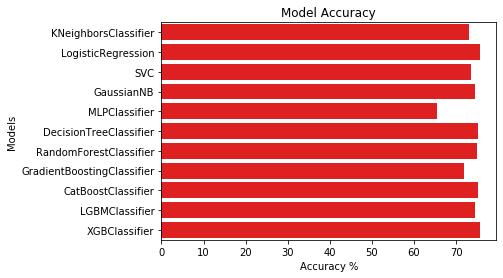

In [179]:
result = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Model Accuracy');    